In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
import xgboost as xgb
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm

from sklearn.preprocessing import StandardScaler

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train = pd.read_json("train.json")
X_test = pd.read_json("test.json")
y_train = pd.DataFrame(X_train.interest_level, columns=['interest_level'])

#2-med
#1 low
#0 hi

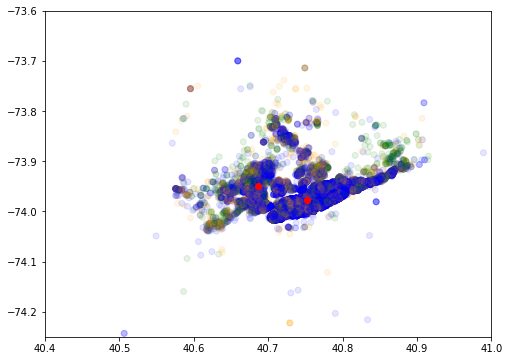

In [6]:
pylab.figure(figsize=(8, 6))
plt.xlim(40.4, 41)
plt.ylim(-74.25, -73.6)
colors = []
for i in y_train.interest_level:
    if i==0:
        colors+=['g']
    if i==1:
        colors+=['b']
    if i==2:
        colors+=['orange']
pylab.scatter(X_train.ix[:, 'latitude'], X_train.ix[:, 'longitude'], color=colors[:], alpha=0.1)


pylab.scatter(X_train.ix[:, 'latitude'].median(), X_train.ix[:, 'longitude'].median(), alpha=1.0, color='red')
pylab.scatter([40.686], [-73.95], alpha=1.0, color='red')

In [35]:
X_train = pd.read_json("train.json")
X_test = pd.read_json("test.json")

skf = StratifiedKFold(5, shuffle=True, random_state=0)
folds = []
for itr, ite in skf.split(X_train, y_train.interest_level.values):
    folds += [[itr, ite]]

    
    
    
image_date = pd.read_csv("listing_image_time.csv")

# rename columns so you can join tables later on
image_date.columns = ["listing_id", "time_stamp"]

# reassign the only one timestamp from April, all others from Oct/Nov
image_date.loc[80240,"time_stamp"] = 1478129766 

image_date["img_date"]                  = pd.to_datetime(image_date["time_stamp"], unit="s")
image_date["img_days_passed"]           = (image_date["img_date"].max() - image_date["img_date"]).astype("timedelta64[D]").astype(int)
image_date["img_date_month"]            = image_date["img_date"].dt.month
image_date["img_date_week"]             = image_date["img_date"].dt.week
image_date["img_date_day"]              = image_date["img_date"].dt.day
image_date["img_date_dayofweek"]        = image_date["img_date"].dt.dayofweek
image_date["img_date_dayofyear"]        = image_date["img_date"].dt.dayofyear
image_date["img_date_hour"]             = image_date["img_date"].dt.hour
image_date["img_date_monthBeginMidEnd"] = image_date["img_date_day"].apply(lambda x: 1 if x<10 else 2 if x<20 else 3)
del image_date["img_date"]

X_train = pd.merge(X_train, image_date, on="listing_id", how="left")    
X_test = pd.merge(X_test, image_date, on="listing_id", how="left")    
    
    
    
    
listing_id = pd.DataFrame(X_train.listing_id)
listing_id.index = range(len(listing_id))

listing_id_test = pd.DataFrame(X_test.listing_id)
listing_id_test.index = range(len(listing_id_test))
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
X_train['interest_level'] = le.fit_transform(X_train['interest_level'])


X_train.index = range(len(X_train))
X_test.index = range(len(X_test))

#basic features
X_train["price_t"] =X_train["price"]/X_train["bedrooms"]
X_test["price_t"] = X_test["price"]/ X_test["bedrooms"] 
X_train["room_sum"] = X_train["bedrooms"]+X_train["bathrooms"] 
X_test["room_sum"] = X_test["bedrooms"]+X_test["bathrooms"] 

X_train["pricePerBath"] = X_train['price'] / X_train['bathrooms']
X_test["pricePerBath"] = X_test['price'] / X_test['bathrooms']

X_train["bedsPerc"] = X_train["bedrooms"] / (X_train['bedrooms'] + X_train['bathrooms'])
X_test["bedsPerc"] = X_test["bedrooms"] / (X_test['bedrooms'] + X_test['bathrooms'])

X_train["pricePerRoom"] = X_train['price'] / (X_train['bedrooms'] + X_train['bathrooms'])
X_test["pricePerRoom"] = X_test['price'] / (X_test['bedrooms'] + X_test['bathrooms'])


# count of photos #
X_train["num_photos"] = X_train["photos"].apply(len)
X_test["num_photos"] = X_test["photos"].apply(len)

# count of "features" #
X_train["num_features"] = X_train["features"].apply(len)
X_test["num_features"] = X_test["features"].apply(len)

# count of words present in description column #
X_train["num_description_words"] = X_train["description"].apply(lambda x: len(x.split(" ")))
X_test["num_description_words"] = X_test["description"].apply(lambda x: len(x.split(" ")))

import os
import sys
import operator
from sklearn import model_selection, preprocessing, ensemble
X_train["created"] = pd.to_datetime(X_train["created"])
X_test["created"] = pd.to_datetime(X_test["created"])

X_train["created_year"] = X_train["created"].dt.year
X_test["created_year"] = X_test["created"].dt.year
X_train["created_month"] = X_train["created"].dt.month
X_test["created_month"] = X_test["created"].dt.month
X_train["created_day"] = X_train["created"].dt.day
X_test["created_day"] = X_test["created"].dt.day
X_train["created_hour"] = X_train["created"].dt.hour
X_test["created_hour"] = X_test["created"].dt.hour

# Расстояни
cent_x = X_train.ix[:, 'latitude'].mean()
cent_y = X_train.ix[:, 'longitude'].mean()
X_train['dist_cent'] = (X_train['latitude'] - cent_x) ** 2 + (X_train['longitude'] - cent_y) ** 2
X_test['dist_cent'] = (X_test['latitude'] - cent_x) ** 2 + (X_test['longitude'] - cent_y) ** 2

med_x = X_train.ix[:, 'latitude'].median()
med_y = X_train.ix[:, 'longitude'].median()
X_train['dist_med'] = (X_train['latitude'] - med_x) ** 2 + (X_train['longitude'] - med_y) ** 2
X_test['dist_med'] = (X_test['latitude'] - med_x) ** 2 + (X_test['longitude'] - med_y) ** 2

rand_x = [40.686]
rand_y = [-73.95]
X_train['dist_ran'] = (X_train['latitude'] - rand_x) ** 2 + (X_train['longitude'] - rand_y) ** 2
X_test['dist_ran'] = (X_test['latitude'] - rand_x) ** 2 + (X_test['longitude'] - rand_y) ** 2



categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        #if X_train[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(X_train[f].values) + list(X_test[f].values))
            X_train[f] = lbl.transform(list(X_train[f].values))
            X_test[f] = lbl.transform(list(X_test[f].values))
            
#X_train['hi_lev'] = np.nan
#X_train['mid_lev'] = np.nan
#X_train['low_lev'] = np.nan

In [36]:
index=list(range(X_train.shape[0]))
random.shuffle(index)
a=[np.nan]*len(X_train)
b=[np.nan]*len(X_train)
c=[np.nan]*len(X_train)


for i in range(5):
    building_level={}
    for j in X_train['manager_id'].values:
        building_level[j]=[0,0,0]
    test_index=index[int((i*X_train.shape[0])/5):int(((i+1)*X_train.shape[0])/5)]
    train_index=list(set(index).difference(test_index))
    for j in train_index:
        temp=X_train.iloc[j]
        if temp['interest_level']==1:
            building_level[temp['manager_id']][0]+=1
        if temp['interest_level']==2:
            building_level[temp['manager_id']][1]+=1
        if temp['interest_level']==0:
            building_level[temp['manager_id']][2]+=1
    for j in test_index:
        temp=X_train.iloc[j]
        if sum(building_level[temp['manager_id']])!=0:
            a[j]=building_level[temp['manager_id']][0]*1.0/sum(building_level[temp['manager_id']])
            b[j]=building_level[temp['manager_id']][1]*1.0/sum(building_level[temp['manager_id']])
            c[j]=building_level[temp['manager_id']][2]*1.0/sum(building_level[temp['manager_id']])


X_train['manager_level_low']=a
X_train['manager_level_medium']=b
X_train['manager_level_high']=c

X_train['log_manager_level_low']=np.log(np.array(a)+0.0000001)
X_train['log_manager_level_medium']=np.log(np.array(b)+0.0000001)
X_train['log_manager_level_high']=np.log(np.array(c)+0.0000001)

X_train['ra1']=building_level[temp['manager_id']][0] - building_level[temp['manager_id']][1]
X_train['ra2']=building_level[temp['manager_id']][1] - building_level[temp['manager_id']][2]
X_train['ra3']=building_level[temp['manager_id']][0] - building_level[temp['manager_id']][2]




a=[]
b=[]
c=[]
building_level={}
for j in X_train['manager_id'].values:
    building_level[j]=[0,0,0]
for j in range(X_train.shape[0]):
    temp=X_train.iloc[j]
    if temp['interest_level']==1:
        building_level[temp['manager_id']][0]+=1
    if temp['interest_level']==2:
        building_level[temp['manager_id']][1]+=1
    if temp['interest_level']==0:
        building_level[temp['manager_id']][2]+=1

for i in X_test['manager_id'].values:
    if i not in building_level.keys():
        a.append(np.nan)
        b.append(np.nan)
        c.append(np.nan)
    else:
        a.append(building_level[i][0]*1.0/sum(building_level[i]))
        b.append(building_level[i][1]*1.0/sum(building_level[i]))
        c.append(building_level[i][2]*1.0/sum(building_level[i]))
X_test['manager_level_low']=a
X_test['manager_level_medium']=b
X_test['manager_level_high']=c

X_test['log_manager_level_low']=np.log(np.array(a)+0.0000001)
X_test['log_manager_level_medium']=np.log(np.array(b)+0.0000001)
X_test['log_manager_level_high']=np.log(np.array(c)+0.0000001)

X_test['ra1']=building_level[temp['manager_id']][0] - building_level[temp['manager_id']][1]
X_test['ra2']=building_level[temp['manager_id']][1] - building_level[temp['manager_id']][2]
X_test['ra3']=building_level[temp['manager_id']][0] - building_level[temp['manager_id']][2]

In [26]:
knns = [2, 4, 8, 16, 32, 64, 128, 256]
for i in knns:
    X_train[str(i) + 'knn_0_prob'] = 0
    X_train[str(i) + 'knn_1_prob'] = 0
    X_train[str(i) + 'knn_2_prob'] = 0


for itr, ite in folds:
#        folds += [[itr, ite]] 
        #print(X_train.isnull().sum())
        grouped = pd.DataFrame(X_train.ix[itr, :][X_train.interest_level==0].groupby(['manager_id']).count().ix[:, 0])\
        /pd.DataFrame(X_train.ix[itr, :].groupby(['manager_id']).count().ix[:, 0])
        grouped['manager_id'] = grouped.index
        grouped.columns = ['hi_lev', 'manager_id']
        tmp = pd.merge(pd.DataFrame(X_train.ix[ite, 'manager_id']), grouped, on='manager_id', how='left')
        X_train.ix[ite, 'hi_lev'] = tmp.ix[ite, 'hi_lev']
        
    
        grouped = pd.DataFrame(X_train.ix[itr, :][X_train.interest_level==2].groupby(['manager_id']).count().ix[:, 0])\
        /pd.DataFrame(X_train.ix[itr, :].groupby(['manager_id']).count().ix[:, 0])
        grouped['manager_id'] = grouped.index
        grouped.columns = ['mid_lev', 'manager_id']
        tmp = pd.merge(pd.DataFrame(X_train.ix[ite, 'manager_id']), grouped, on='manager_id', how='left')
        X_train.ix[ite, 'mid_lev'] = tmp.ix[ite, 'mid_lev']
    
        grouped = pd.DataFrame(X_train.ix[itr, :][X_train.interest_level==1].groupby(['manager_id']).count().ix[:, 0])\
        /pd.DataFrame(X_train.ix[itr, :].groupby(['manager_id']).count().ix[:, 0])
        grouped['manager_id'] = grouped.index
        grouped.columns = ['low_lev', 'manager_id']
        tmp = pd.merge(pd.DataFrame(X_train.ix[ite, 'manager_id']), grouped, on='manager_id', how='left')
        X_train.ix[ite, 'low_lev'] = tmp.ix[ite, 'low_lev']
        
        
        
        #Kfold фича по геоданным
        for i in knns:
            neigh = KNeighborsClassifier(n_neighbors=i)
            neigh.fit(X_train.ix[itr, ['latitude', 'longitude']], y_train.ix[itr, :])
            X_train.ix[ite, [str(i) + 'knn_0_prob', str(i) + 'knn_1_prob', str(i) + 'knn_2_prob']] = neigh.predict_proba(X_train.ix[ite, ['latitude', 'longitude']])
        
X_train.fillna(0, inplace=True)        


/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [27]:
        knns = [2, 4, 8, 16, 32, 64, 128, 256]
        for i in knns:
            X_test[str(i) + 'knn_0_prob'] = 0
            X_test[str(i) + 'knn_1_prob'] = 0
            X_test[str(i) + 'knn_2_prob'] = 0
    
        grouped = pd.DataFrame(X_train.ix[:, :][X_train.interest_level==0].groupby(['manager_id']).count().ix[:, 0])\
        /pd.DataFrame(X_train.ix[:, :].groupby(['manager_id']).count().ix[:, 0])
        grouped['manager_id'] = grouped.index
        grouped.columns = ['hi_lev', 'manager_id']
        tmp = pd.merge(pd.DataFrame(X_test.ix[:, 'manager_id']), grouped, on='manager_id', how='left')
        X_test.ix[:, 'hi_lev'] = tmp.ix[:, 'hi_lev']
        
        grouped = pd.DataFrame(X_train.ix[:, :][X_train.interest_level==2].groupby(['manager_id']).count().ix[:, 0])\
        /pd.DataFrame(X_train.ix[:, :].groupby(['manager_id']).count().ix[:, 0])
        grouped['manager_id'] = grouped.index
        grouped.columns = ['mid_lev', 'manager_id']
        tmp = pd.merge(pd.DataFrame(X_test.ix[:, 'manager_id']), grouped, on='manager_id', how='left')
        X_test.ix[:, 'mid_lev'] = tmp.ix[:, 'mid_lev']
        
        grouped = pd.DataFrame(X_train.ix[:, :][X_train.interest_level==1].groupby(['manager_id']).count().ix[:, 0])\
        /pd.DataFrame(X_train.ix[:, :].groupby(['manager_id']).count().ix[:, 0])
        grouped['manager_id'] = grouped.index
        grouped.columns = ['low_lev', 'manager_id']
        tmp = pd.merge(pd.DataFrame(X_test.ix[:, 'manager_id']), grouped, on='manager_id', how='left')
        X_test.ix[:, 'low_lev'] = tmp.ix[:, 'low_lev']
        
                #Kfold фича по геоданным
        for i in knns:
            neigh = KNeighborsClassifier(n_neighbors=i)
            neigh.fit(X_train.ix[:, ['latitude', 'longitude']], y_train.ix[:, :])
            X_test.ix[:, [str(i) + 'knn_0_prob', str(i) + 'knn_1_prob', str(i) + 'knn_2_prob']] = neigh.predict_proba(X_test.ix[:, ['latitude', 'longitude']])
        
        
X_test.fillna(0, inplace=True)        


/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [46]:
step = (100000 - 400) / 6.0
X_train['price_quant'] = 0
X_train[X_train.price < 5000]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,8knn_0_prob,8knn_1_prob,8knn_2_prob,16knn_0_prob,16knn_1_prob,16knn_2_prob,hi_lev,mid_lev,low_lev,price_quant
0,1.5,3,3797,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,12282,[],2,40.7145,7211212,...,0.000,1.000,0.000,0.1250,0.8750,0.0000,0.000000,0.226667,0.773333,0
2,1.0,1,8889,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",13719,"[Laundry In Building, Dishwasher, Hardwood Flo...",0,40.7388,6887163,...,0.125,0.750,0.125,0.1875,0.5625,0.2500,0.003215,0.006431,0.990354,0
3,1.0,1,1848,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,10866,"[Hardwood Floors, No Fee]",1,40.7539,6888711,...,0.000,0.875,0.125,0.0000,0.9375,0.0625,0.000000,0.000000,1.000000,0
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,15072,[Pre-War],1,40.8241,6934781,...,0.125,0.500,0.375,0.1250,0.6250,0.2500,0.025210,0.184874,0.789916,0
6,1.0,2,2711,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,14964,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",1,40.8012,6930771,...,0.000,1.000,0.000,0.0000,1.0000,0.0000,0.000000,0.000000,0.000000,0
8,1.0,1,7635,2016-04-20 02:36:35,<p><a website_redacted,11646,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",2,40.8234,6898799,...,0.250,0.375,0.375,0.3125,0.1875,0.5000,0.000000,0.000000,1.000000,0
10,1.0,0,0,2016-04-14 01:10:30,New to the market! Spacious studio located in ...,15694,[],1,40.7769,6869199,...,0.125,0.875,0.000,0.1250,0.6875,0.1875,0.200000,0.500000,0.300000,0
11,1.0,1,0,2016-06-03 03:21:22,Check out this one bedroom apartment in a grea...,14685,"[prewar, dishwasher, HIGHRISE, ROOFDECK, EAT I...",1,40.8448,7102986,...,0.000,0.875,0.125,0.0000,0.8125,0.1875,0.000000,0.375000,0.625000,0
12,1.0,2,4753,2016-04-19 05:37:25,***LOW FEE. Beautiful CHERRY OAK WOODEN FLOORS...,9660,"[Doorman, Elevator, Laundry in Building, No Fee]",0,40.7488,6895442,...,0.125,0.875,0.000,0.0625,0.7500,0.1875,0.000000,0.500000,0.500000,0
14,1.0,1,0,2016-06-01 03:11:01,Spacious 1-Bedroom to fit King-sized bed comfo...,10903,"[Elevator, Multi-Level, Laundry in Building, D...",1,40.7584,7089402,...,0.375,0.625,0.000,0.1875,0.7500,0.0625,0.000000,0.000000,1.000000,0


In [65]:
a = X_train['price']
a = pd.DataFrame(a)
len(a.price.unique())

2808

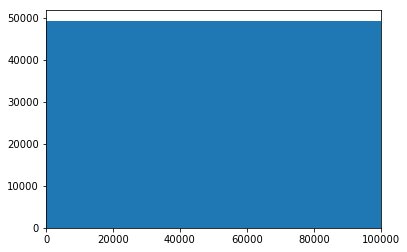

In [59]:
a = X_train['price']
a = pd.DataFrame(a)
#pylab.figure(figsize=(20, 6))
plt.xlim(0, 100000)
plt.hist(a.price, bins=1)
plt.show()


In [686]:
X_test

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,created_year,created_month,created_day,created_hour,manager_level_low,manager_level_medium,manager_level_high,hi_lev,mid_lev,low_lev
0,1.0,1,5535,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,13274,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,...,2016,6,11,5,0.458333,0.333333,0.208333,0.208333,0.333333,0.458333
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,13391,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,...,2016,6,24,6,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,1.0,1,2813,2016-06-03 04:29:40,New York chic has reached a new level ...,990,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,...,2016,6,3,4,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,1.0,2,5477,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,481,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,...,2016,6,11,6,0.245902,0.393443,0.360656,0.360656,0.393443,0.245902
4,2.0,2,4428,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...",12317,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,...,2016,4,12,5,0.597222,0.319444,0.083333,0.083333,0.319444,0.597222
5,3.0,3,7129,2016-04-07 06:14:43,In a boutique prewar building with 24 hour doo...,14924,"[Fireplace, Dining Room, Doorman, Elevator, La...",40.7901,6840081,-73.9774,...,2016,4,7,6,0.988764,0.011236,0.000000,0.000000,0.011236,0.988764
6,1.0,2,5871,2016-04-25 03:07:55,WHY PAY OTHER BROKERS 15% FOR A GREAT APARTMEN...,10056,"[Hardwood Floors, New Construction]",40.7730,6922337,-73.9571,...,2016,4,25,3,0.779221,0.201299,0.019481,0.019481,0.201299,0.779221
7,1.0,0,0,2016-04-22 06:13:49,- Spectacular renovated studio in restored tow...,12996,"[Fireplace, Pre-War, Laundry in Building, Dish...",40.6751,6913616,-73.9511,...,2016,4,22,6,0.571429,0.285714,0.142857,0.142857,0.285714,0.571429
8,1.0,2,2914,2016-04-28 05:32:45,Beautiful 2Br apartment with Cherry hardwood f...,15294,"[Dogs Allowed, Cats Allowed]",40.7597,6937820,-73.9929,...,2016,4,28,5,0.686538,0.245559,0.067904,0.067904,0.245559,0.686538
9,1.0,0,5665,2016-04-19 03:25:02,Hardwood Floors<br/><br/>EXPOSED BRICK<br/><br...,12650,"[Loft, Hardwood Floors]",40.7208,6893933,-73.9887,...,2016,4,19,3,0.343750,0.468750,0.187500,0.187500,0.468750,0.343750


In [37]:
y_train = pd.DataFrame(X_train.interest_level, columns=['interest_level'])
del X_train['interest_level']

In [38]:
X = map(lambda x: ' '.join(x), X_train['features'])
X1 = map(lambda x: ' '.join(x), X_test['features'])

hw = HashingVectorizer(n_features=300).fit(X_train['features'])

X = pd.DataFrame(hw.transform(X).todense())
X1 = pd.DataFrame(hw.transform(X1).todense())


X_train.index = range(len(X_train))
X_test.index = range(len(X_test))

X_train = pd.concat([X_train, X], axis=1, join_axes=[X_train.index])
X_test = pd.concat([X_test, X1], axis=1, join_axes=[X_test.index])

In [30]:
def create_binary_features(df):
    bows = {
        "dogs": ("dogs", "dog"),
        "cats": ("cats",),
        "nofee": ("no fee", "no-fee", "no  fee", "nofee", "no_fee"),
        "lowfee": ("reduced_fee", "low_fee", "reduced fee", "low fee"),
        "furnished": ("furnished",),
        "parquet": ("parquet", "hardwood"),
        "concierge": ("concierge", "doorman", "housekeep", "in_super"),
        "prewar": ("prewar", "pre_war", "pre war", "pre-war"),
        "laundry": ("laundry", "lndry"),
        "health": ("health", "gym", "fitness", "training"),
        "transport": ("train", "subway", "transport"),
        "parking": ("parking",),
        "utilities": ("utilities", "heat water", "water included")
    }

    def indicator(bow):
        return lambda s: int(any([x in s for x in bow]))

    features = df["features"].apply(lambda f: " ".join(f).lower())   # convert features to string
    for key in bows:
        df["feature_" + key] = features.apply(indicator(bows[key]))

    return df

X_train = create_binary_features(X_train)
X_test = create_binary_features(X_test)

In [39]:
#del X_train['listing_id']
del X_train['description']
del X_train['created']
del X_train['features']
del X_train['photos']

#del X_test['listing_id']
del X_test['description']
del X_test['created']
del X_test['features']
del X_test['photos']

In [40]:
X_train.replace(np.inf, np.nan, inplace=True)
X_train.fillna(X_train.median(), inplace=True)
X_test.replace(np.inf, np.nan, inplace=True)
X_test.fillna(X_test.median(), inplace=True)

,bathrooms,bedrooms,building_id,display_address,latitude,listing_id,longitude,manager_id,price,street_address,...,290,291,292,293,294,295,296,297,298,299
0,1.0,1,5535,13274,40.7185,7142618,-73.9865,3076,2950,24898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2,0,13391,40.7278,7210040,-74.0000,3593,2850,5492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1,2813,990,40.7306,7103890,-73.9890,2677,3758,541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2,5477,481,40.7109,7143442,-73.9571,201,3300,10531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2,4428,12317,40.7650,6860601,-73.9845,3157,4900,10907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,3,7129,14924,40.7901,6840081,-73.9774,2579,9000,21102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,2,5871,10056,40.7730,6922337,-73.9571,1369,2800,8157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0,0,12996,40.6751,6913616,-73.9511,222,1900,22471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,2,2914,15294,40.7597,6937820,-73.9929,3959,3000,17155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0,5665,12650,40.7208,6893933,-73.9887,429,2300,4088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
scal = preprocessing.StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [14]:
X_train.shape

(49352, 253)

In [15]:
import keras
y_train_cat = keras.utils.to_categorical(y_train)

Using TensorFlow backend.


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, AveragePooling1D

y_train_cat = keras.utils.to_categorical(y_train)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='tanh', input_dim=253))
model.add(Dropout(0.3))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))

model.add(Dense(3, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#model.fit(X_train.ix[itr, :].values, y_train_cat[itr],
#          epochs=60,
#          batch_size=1000,
#          validation_data=(X_train.ix[ite, :].values, y_train_cat[ite]))
#score = model.evaluate(X_train.ix[ite, :].values, y_train_cat[ite], batch_size=128)


In [34]:
lin = sklearn.linear_model.LogisticRegression()

In [ ]:

param = {}
param['objective'] = 'multi:softprob'
param['eval_metric'] = 'mlogloss'
param['max_depth'] = 6
# param['booster'] = 'dart'
#param['booster'] = 'gblinear'
param['eta'] = 0.3
#param['subsample'] = 1.0
# param["scale_pos_weight"] = 0.5
#param['colsample_bytree'] = 0.7
param['nthread'] = 8
param['num_class'] = 3
#param['alpha'] = 0.00
#param['lambda_bias'] = 0.1
# param['lambda'] = 0
#param['min_child_weight'] = 100

# if param['booster'] == 'gblinear': param['eta'] *= 1e-4
numround = 100

#LGBM
params = {
    #'task': 'train',
    #'boosting_type': 'gbdt',
    #'objective': 'regression',
    #'metric': {'l2', 'auc'},
    #'num_leaves': 31,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    #'bagging_freq': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'objective': 'multiclass',
    'nthread': -1,
    'learning_rate': 0.03,
    'min_child_weight': 50,
    #'max_depth': 6
    #'num_class': 3
    
}



skf = StratifiedKFold(5, shuffle=True, random_state=0)
pred_train = np.zeros((len(y_train), 3))
xgbs = []
sc,sc_mean = [],[]

for itr, ite in folds:
    ypred = []
    for i in range(1):
               
        param['seed'] = i+1

        #xgboost
        '''
        Xdatatrain = xgb.DMatrix(data=X_train.ix[itr, :].values,
                                     label=y_train.ix[itr].values)
        Xdataval = xgb.DMatrix(data=X_train.ix[ite, :].values,
                                     label=y_train.ix[ite].values)

        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdataval, 'eval')]
        bst = xgb.train(plst, Xdatatrain, numround, evals=watchlist, verbose_eval=20)

        
        #rc = ensemble.ExtraTreesClassifier(n_estimators=1300, criterion='gini', max_depth=None, n_jobs=-1)
        #pred_train[ite] = bst.predict(Xdataval)
        #neigh = KNeighborsClassifier(n_neighbors=2)
        #neigh.fit(X_train.ix[itr, :], y_train.ix[itr])
        ypred = bst.predict(Xdataval)
        #ypred = neigh.predict_proba(X_train.ix[ite, :])
        xgbs.append(bst)
        '''
        
        # train
        lgb = lgbm.sklearn.LGBMClassifier(n_estimators=1000, seed=0, **params)
        lgb.fit(X_train.ix[itr, :], y_train.ix[itr])
        ypred = lgb.predict_proba(X_train.ix[ite, :])
        '''
        model.fit(X_train.ix[itr, :].values, y_train_cat[itr],
            epochs=60,
            batch_size=1000)
        ypred = model.predict(X_train.ix[ite, :].values)
        '''
    #ypred = sum(ypred) / len(ypred)
    pred_train[ite] = ypred
    
    sc.append(log_loss(y_train.ix[ite, :], ypred))
#     break 0.523298 0.5192 0.517532 0.515532

print('XGB: {:.3f} +- {:.3f}'.format(np.mean(sc), np.std(sc)))  

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [70]:
lgb.best_iteration

-1

In [ ]:
0.517
0.518
0.520
0.521
0.522
0.523

In [ ]:
0.520
0.525
0.527
0.538
0.551
0.553
0.558

Populating the interactive namespace from numpy and matplotlib


/home/fao3864/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


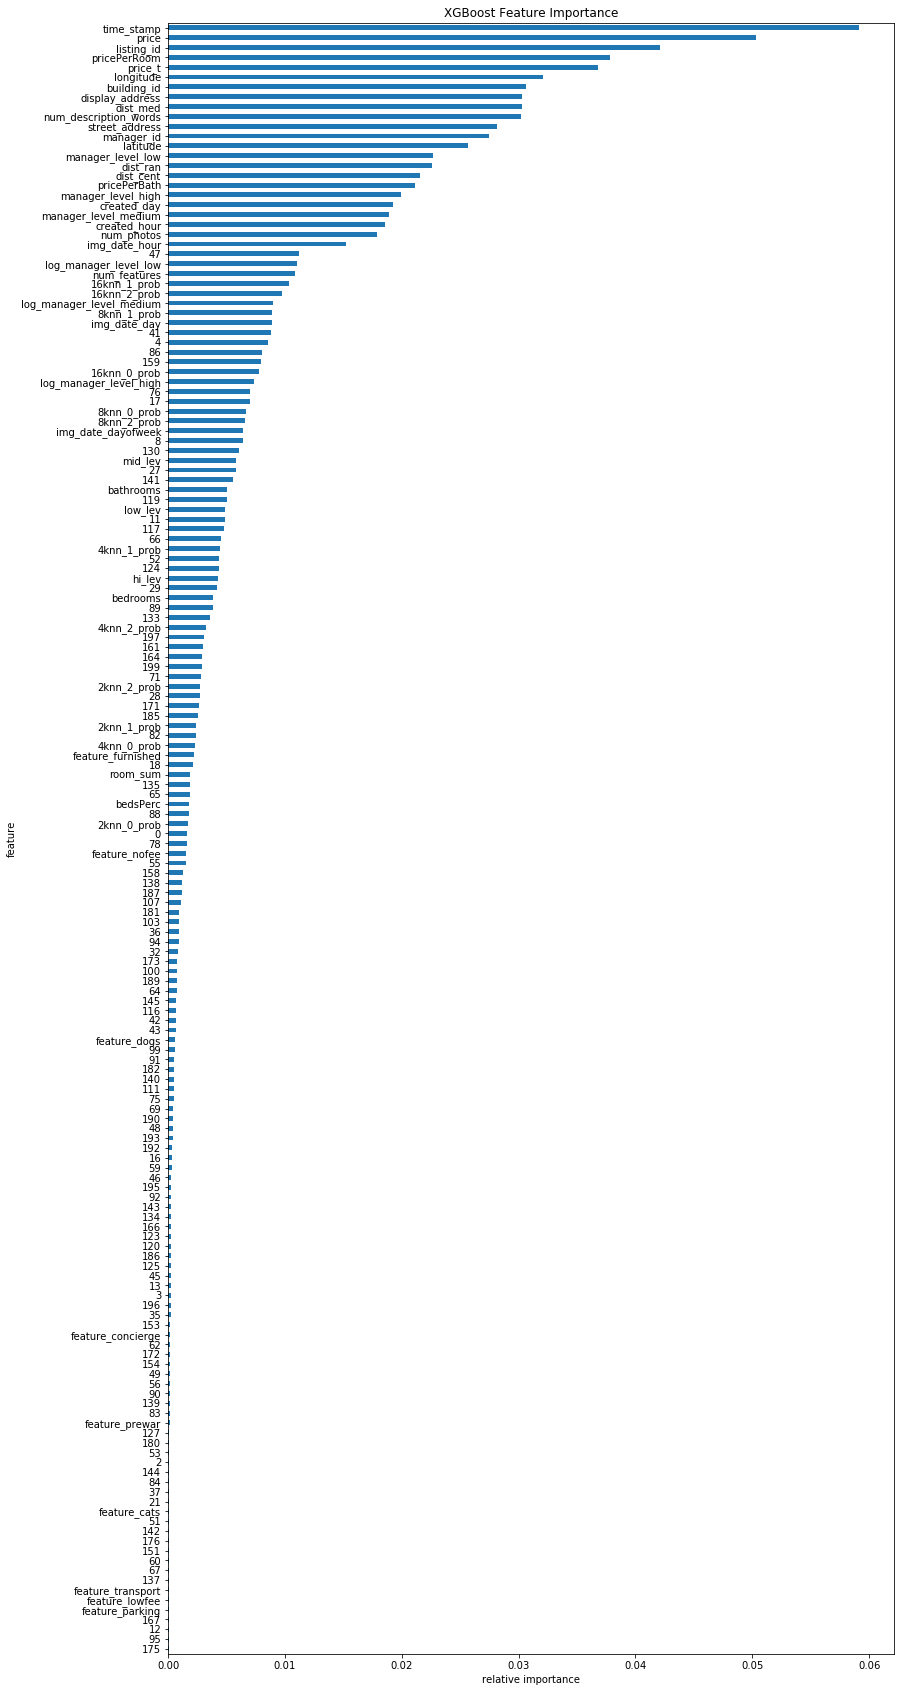

In [65]:
%matplotlib inline
%pylab inline
import operator

fnames = X_train.columns
importance = xgbs[0].get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df.feature = [fnames[int(item[1:])] for item in df.feature]
df['fscore'] = df['fscore'] / df['fscore'].sum()
df = df.loc[:170]
plt.figure()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(13,30))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

In [18]:
# Для стекинга
pred_train = pd.DataFrame(pred_train, columns=["high", "low", "medium"])
pred_train = pd.concat([listing_id, pred_train], axis=1, join_axes=[listing_id.index])
pred_train.to_csv("stacking/nn_16.csv", index=None)

In [138]:
Xdatatrain = xgb.DMatrix(data=X_train.values,
                                     label=y_train.values)
Xdatatest = xgb.DMatrix(data=X_test.values)
plst = list(param.items())
numround = 350
bst = xgb.train(plst, Xdatatrain, numround,  verbose_eval=20)
test_pred = bst.predict(Xdatatest)

In [26]:
        rc = ensemble.ExtraTreesClassifier(n_estimators=1300, criterion='gini', max_depth=None, n_jobs=-1)
        #pred_train[ite] = bst.predict(Xdataval)
        rc.fit(X_train, y_train)
        #ypred = rc.predict(Xdataval)
        test_pred = rc.predict_proba(X_test)

/home/fao3864/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [117]:
        lgb = lgbm.sklearn.LGBMClassifier(n_estimators=1000, seed=0, **params)
        lgb.fit(X_train, y_train)
        test_pred = lgb.predict_proba(X_test)

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
test_pred = model.predict(X_test.values)


Populating the interactive namespace from numpy and matplotlib


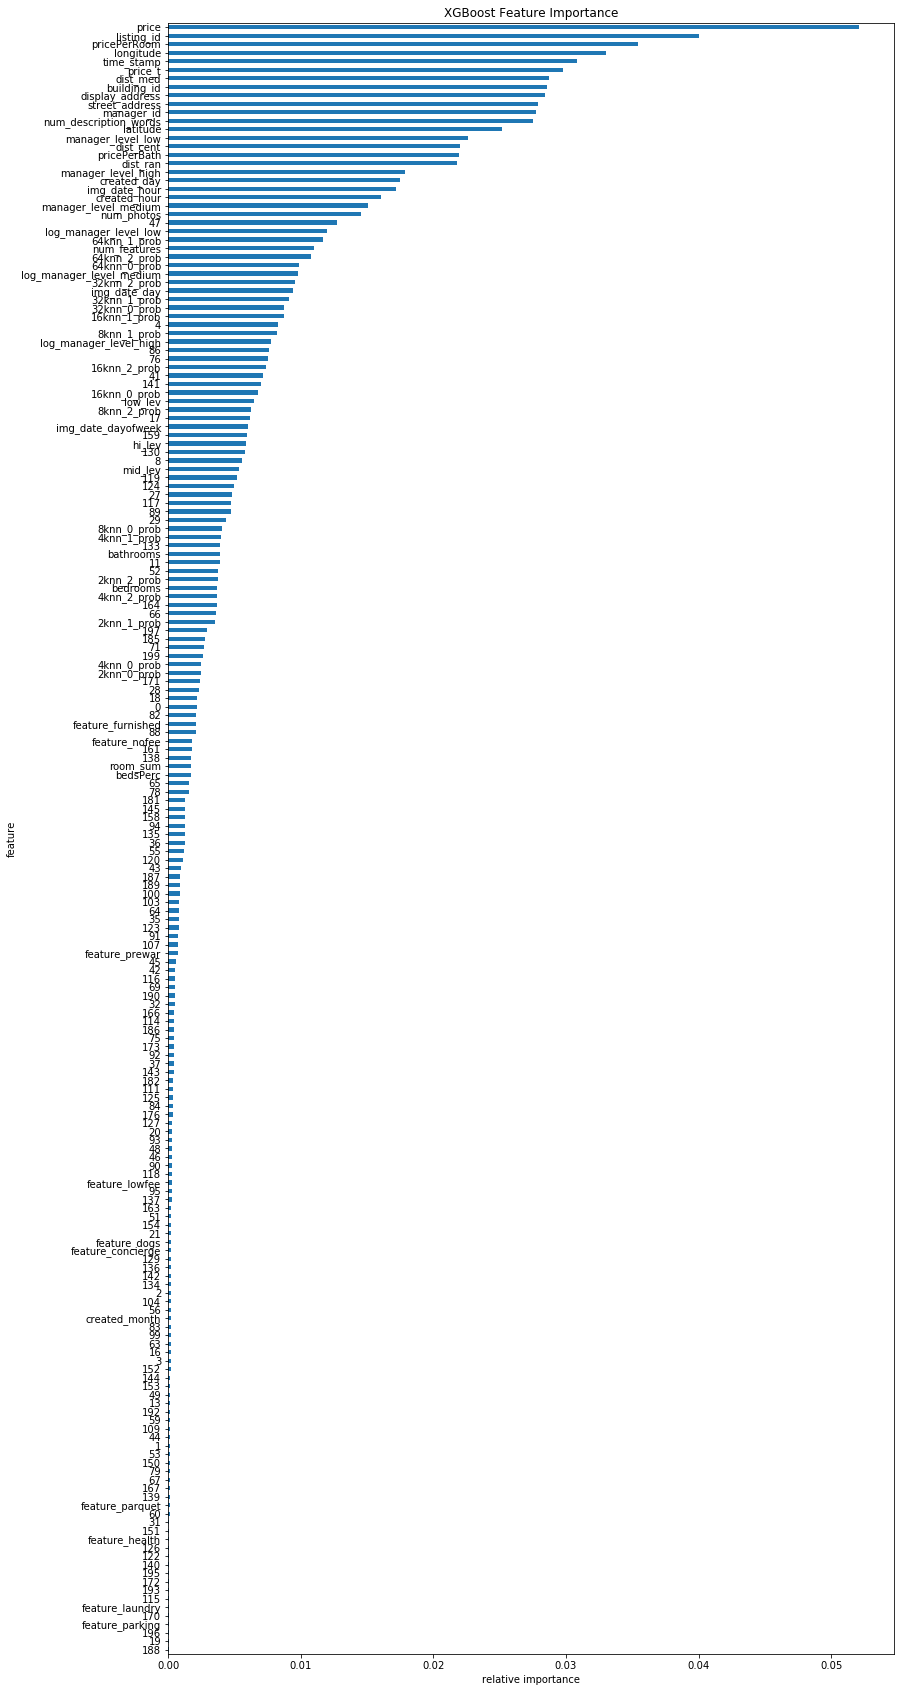

In [139]:
%matplotlib inline
%pylab inline
import operator

fnames = X_train.columns
importance = bst.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df.feature = [fnames[int(item[1:])] for item in df.feature]
df['fscore'] = df['fscore'] / df['fscore'].sum()
#df = df.loc[:170]
plt.figure()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(13,30))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

In [20]:
test_pred

array([[  1.11840002e-01,   1.98779643e-01,   6.89380407e-01],
       [  5.59009903e-04,   9.94951844e-01,   4.48918855e-03],
       [  2.82772188e-03,   9.28994060e-01,   6.81782439e-02],
       ..., 
       [  2.45190784e-02,   6.35439992e-01,   3.40040892e-01],
       [  2.67669976e-01,   3.24661791e-01,   4.07668203e-01],
       [  1.02853645e-02,   8.51009965e-01,   1.38704717e-01]], dtype=float32)

In [21]:

test_pred = pd.DataFrame(test_pred, columns=["high", "low", "medium"])
test_pred = pd.concat([listing_id_test, test_pred], axis=1, join_axes=[listing_id_test.index])
sample_submission = pd.read_csv("sample_submission.csv")

In [36]:
medium = test_pred.medium
low = test_pred.low
del test_pred['medium']
del test_pred['low']
test_pred['medium'] = medium
test_pred['low'] = low

In [22]:
test_pred

,listing_id,high,low,medium
0,7142618,0.111840,0.198780,0.689380
1,7210040,0.000559,0.994952,0.004489
2,7103890,0.002828,0.928994,0.068178
3,7143442,0.335620,0.103439,0.560941
4,6860601,0.023402,0.631666,0.344932
5,6840081,0.001454,0.960051,0.038495
6,6922337,0.003858,0.850183,0.145959
7,6913616,0.105216,0.423055,0.471729
8,6937820,0.041438,0.738278,0.220284
9,6893933,0.087205,0.475046,0.437750


In [23]:
test_pred.to_csv("stacking/nn_16_test.csv", index=None)

In [427]:
X_test.shape

(74659, 218)